In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls drive/MyDrive/data_multilabel/

Multi_Label_dataset/  Multi_Label_dataset.zip


In [5]:
cd drive/MyDrive/data_multilabel/

/content/drive/MyDrive/data_multilabel


In [6]:
ls

Multi_Label_dataset/  Multi_Label_dataset.zip


In [ ]:
ls Multi_Label_dataset/Images/

In [ ]:
!unzip Multi_Label_dataset.zip

In [13]:
import keras 
from keras.models import Sequential 
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical 
from keras.preprocessing import image
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [10]:
train = pd.read_csv("Multi_Label_dataset/train.csv")

In [23]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [16]:
train_images = []
for i in tqdm(range(0,1000)):
  img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
  img = image.img_to_array(img)
  img = img/255
  train_images.append(img)
X = np.array(train_images)

100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]


In [18]:
X.shape

(1000, 400, 400, 3)

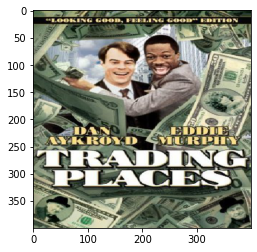

In [24]:
plt.imshow(X[2])